# Gradient Descent and Newton's Method
***Author: Pratyush Bagaria (pbagar2@uic.edu)***

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import time as t
import math

In [14]:
def gradientDescent(eta,w):
    gradientEnergies = []
    gradientXvalues = []
    gradientYvalues = []
    print ("For Gradient Descent, Learning Rate (η) =",eta)   
    while ((w[0]+w[1])<1) and (w[0]>0) and (w[1]>0):
        energy = - math.log(1-w[0]-w[1]) - math.log(w[0]) - math.log(w[1])
        gradientEnergies.append(energy)
        gradientXvalues.append(w[0])
        gradientYvalues.append(w[1])
        Xgradient = (2*w[0]+w[1]-1)/(w[0]*(1-w[0]-w[1]))
        Ygradient = (2*w[1]+w[0]-1)/(w[1]*(1-w[0]-w[1]))
        gradient = np.array([Xgradient, Ygradient])
        delta_w = - eta * gradient

        if np.linalg.norm(w - np.add(w,delta_w)) < 0.0000000001:
            break
        else:
            w = np.add(w,delta_w)
    return gradientXvalues, gradientYvalues, gradientEnergies

In [15]:
def newtonsMethod(eta,w):
    newtonsEnergies = []
    newtonsXvalues = []
    newtonsYvalues = []
    print ("For Newton's Method, Learning Rate (η) =",eta)
    while ((w[0]+w[1])<1) and (w[0]>0) and8ik9m ji9k, i9 (w[1]>0):
        energy = - math.log(1-w[0]-w[1]) - math.log(w[0]) - math.log(w[1])
        newtonsEnergies.append(energy) 
        newtonsXvalues.append(w[0])
        newtonsYvalues.append(w[1])
        Xgradient = (2*w[0]+w[1]-1)/(w[0]*(1-w[0]-w[1]))
        Ygradient = (2*w[1]+w[0]-1)/(w[1]*(1-w[0]-w[1]))
        gradient = np.array([Xgradient, Ygradient])
        h11 = 1/((1-w[0]-w[1])*(1-w[0]-w[1])) + 1/(w[0]*w[0])
        h22 = 1/((1-w[0]-w[1])*(1-w[0]-w[1])) + 1/(w[1]*w[1])
        h = 1/(1- w[0]-w[1]) * (1- w[0]-w[1])
        hessian = np.array([[h11, h],
                            [h, h22]])

        delta_w = - eta * np.matmul(inv(hessian), gradient)
        if np.linalg.norm(w - np.add(w,delta_w)) < 0.0000000001:
            break
        else:
            w = np.add(w,delta_w)
    return newtonsXvalues, newtonsYvalues, newtonsEnergies

In [16]:
def plotPointsTrajectory(gradientXvalues, gradientYvalues, newtonsXvalues, newtonsYvalues):
    plt.subplot(1, 2, 1)
    plt.scatter(gradientXvalues, gradientYvalues)
    plt.xlabel("\nX-Values\n(Points Trajectory for Gradient Descent)\n\n",fontsize=18)
    plt.ylabel("\nY-Values\n",fontsize=18)

    plt.subplot(1, 2, 2)
    plt.scatter(newtonsXvalues, newtonsYvalues)
    plt.xlabel("\nX-Values\n(Points Trajectory for Newton's method)\n\n",fontsize=18)
    plt.ylabel("\nY-Values\n",fontsize=18)

    plt.tight_layout(rect=[0, 0, 3, 2])
    plt.show()

In [17]:
def plotIterationsVsEnergiesGraph(gradientEnergies, newtonsEnergies):
    plt.subplot(1, 2, 1)
    plt.scatter(range(len(gradientEnergies)), gradientEnergies)
    plt.xlabel('\nIteration #\n(Energies graph for Gradient Descent)\n',fontsize=18)
    plt.ylabel('\nCorresponding Energy Value\n',fontsize=18)

    plt.subplot(1, 2, 2)
    plt.scatter(range(len(newtonsEnergies)), newtonsEnergies)
    plt.xlabel("\nIteration #\n(Energies graph for Newton's method)\n",fontsize=18)
    plt.ylabel('\nCorresponding Energy Value\n',fontsize=18)

    plt.tight_layout(rect=[0, 0, 3, 2])
    plt.show()

Initial points considered in w0 = [0.2 0.7]
For Gradient Descent, Learning Rate (η) = 0.01
Gradient Descent took 0.00476 sec to converge
For Newton's Method, Learning Rate (η) = 1
Newton's method took 0.00216 sec to converge


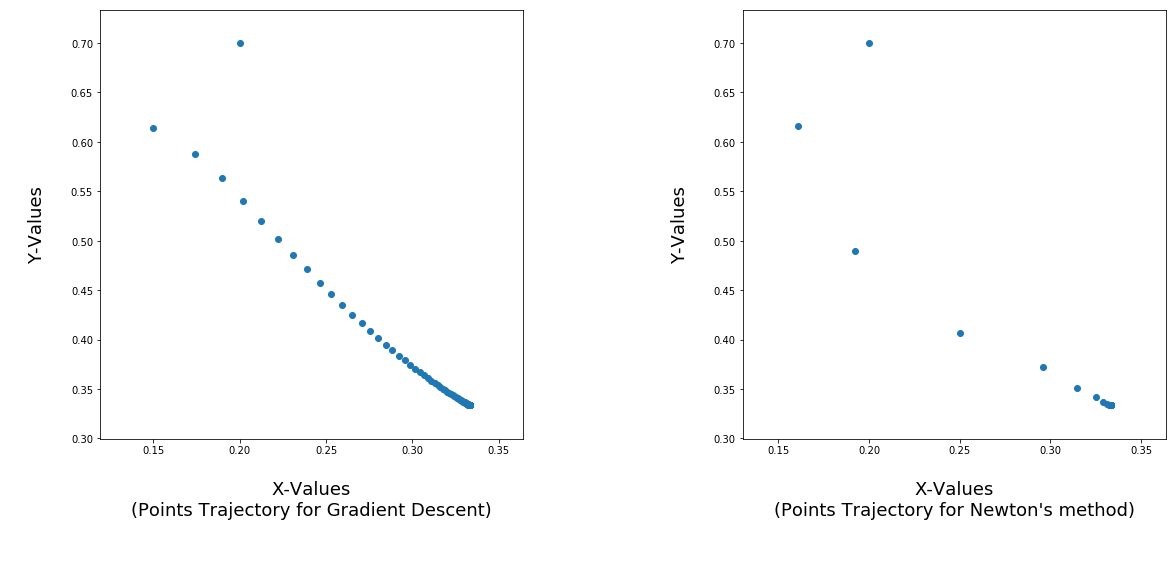

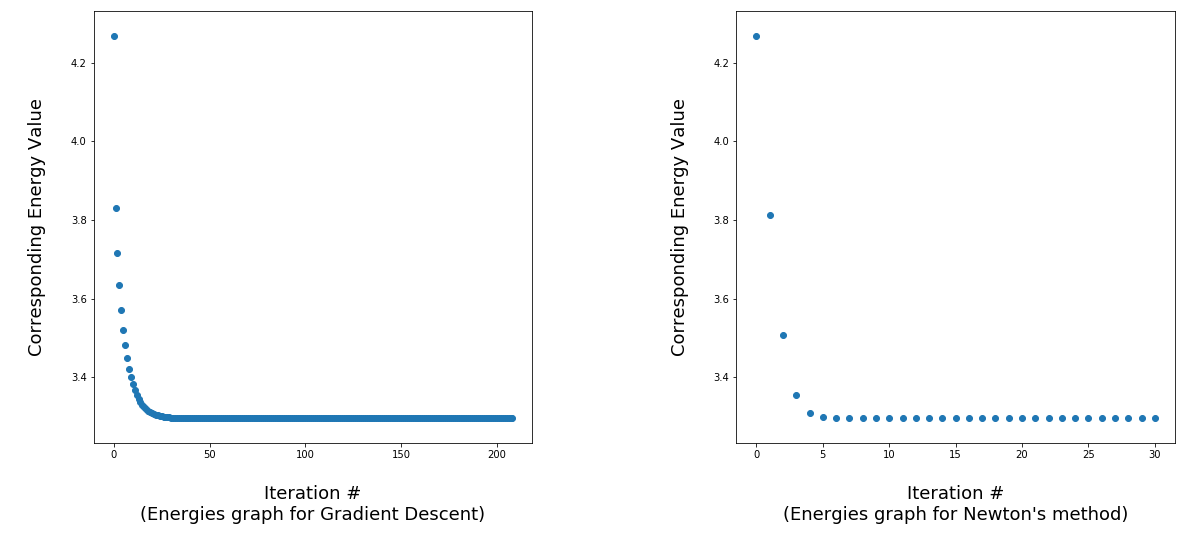

In [18]:
w = np.array([0.2,0.7])
print ("Initial points considered in w0 =", w)
gradient_timer = t.perf_counter()
gradientXvalues, gradientYvalues, gradientEnergies = gradientDescent(0.01,w)
print("Gradient Descent took",round((t.perf_counter()-gradient_timer),5),"sec to converge")
newtons_timer = t.perf_counter()
newtonsXvalues, newtonsYvalues, newtonsEnergies = newtonsMethod(1,w)
print("Newton's method took",round((t.perf_counter()-newtons_timer),5),"sec to converge")
plotPointsTrajectory(gradientXvalues, gradientYvalues, newtonsXvalues, newtonsYvalues)
plotIterationsVsEnergiesGraph(gradientEnergies, newtonsEnergies)

**For the function, f(x,y) = - log(1-x-y) - log(x) - log(y) and domain (D) = {(x,y) : x+y<1; x>0; y>0},**

**Newton's method is 0.01651 seconds faster than Gradient Descent method**